# Resampling experiments

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np

from src.dataset.make_dataset import Dataset
from src.features.build_features import build_processed_dataset, convert_category_cols_lgb
from src.model.train_model import train_lgb
from src.visualization.model_visualizer import plot_classification_report, plot_confusion_matrix, plot_rocauc, plot_pr

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import lightgbm as lgb

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Basic LGB

In [15]:
ds = Dataset()
ds.load_dataset("30000")
build_processed_dataset(ds)
convert_category_cols_lgb(ds)

In [32]:
X = SimpleImputer(missing_values=np.nan, strategy="mean").fit_transform(ds.X_train).copy()
y = ds.y_train.copy()

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
lgb_params = {
        "num_leaves": 2 ** 8,
        "min_child_samples": 79,
        "objective": "binary",
        "metric": "auc",
        "max_depth": 13,
        "learning_rate": 0.01,
        "tree_learner": "serial",
        "colsample_bytree": 0.7,
        "subsample": 0.7,
        "subsample_freq": 1,
        "scale_pos_weight": 10,
        "boosting_type": "gbdt",
        "max_bin": 255,
        "verbosity": -1,
        "seed": 1337,
    }

In [37]:
clf = train_lgb(X_train, y_train, X_valid, y_valid, lgb_params, n_estimators=500, n_jobs=1)

Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.998016	training's auc: 0.998016	valid_1's auc: 0.912603	valid_1's auc: 0.912603
[200]	training's auc: 0.999308	training's auc: 0.999308	valid_1's auc: 0.91925	valid_1's auc: 0.91925
[300]	training's auc: 0.99967	training's auc: 0.99967	valid_1's auc: 0.921407	valid_1's auc: 0.921407
[400]	training's auc: 0.99988	training's auc: 0.99988	valid_1's auc: 0.924058	valid_1's auc: 0.924058
[500]	training's auc: 0.999971	training's auc: 0.999971	valid_1's auc: 0.925821	valid_1's auc: 0.925821
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999971	training's auc: 0.999971	valid_1's auc: 0.925821	valid_1's auc: 0.925821


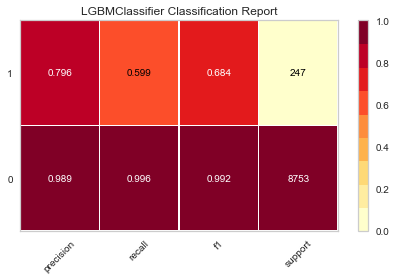

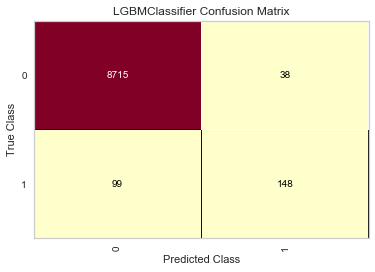

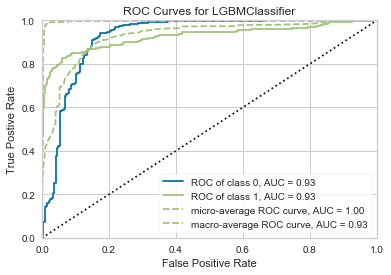

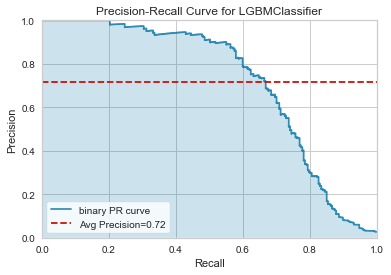

In [38]:
plot_classification_report(clf, X_valid, y_valid)
plot_confusion_matrix(clf, X_valid, y_valid)
plot_rocauc(clf, X_valid, y_valid)
plot_pr(clf, X_train, y_train, X_valid, y_valid)

## Oversampling

In [40]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

#### Random oversampling

In [34]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
clf_oversample = train_lgb(X_resampled, y_resampled, X_valid, y_valid, lgb_params, n_estimators=500, n_jobs=1)

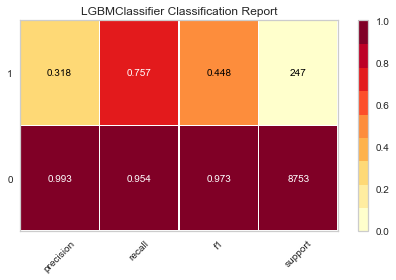

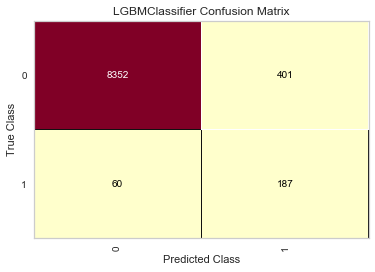

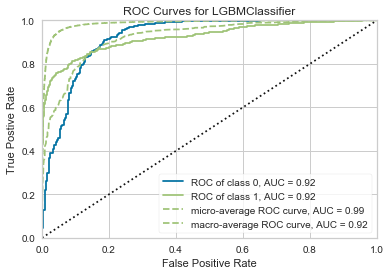

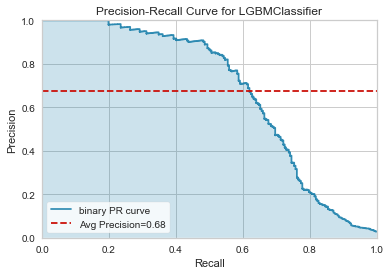

In [36]:
plot_classification_report(clf_oversample, X_valid, y_valid)
plot_confusion_matrix(clf_oversample, X_valid, y_valid)
plot_rocauc(clf_oversample, X_valid, y_valid)
plot_pr(clf_oversample, X_resampled, y_resampled, X_valid, y_valid)

#### SMOTE, ADASYN

In [41]:
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
clf_smote = train_lgb(X_resampled, y_resampled, X_valid, y_valid, lgb_params, n_estimators=500, n_jobs=1)

Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.997496	training's auc: 0.997496	valid_1's auc: 0.873971	valid_1's auc: 0.873971
[200]	training's auc: 0.999339	training's auc: 0.999339	valid_1's auc: 0.891321	valid_1's auc: 0.891321
[300]	training's auc: 0.999771	training's auc: 0.999771	valid_1's auc: 0.900356	valid_1's auc: 0.900356
[400]	training's auc: 0.999924	training's auc: 0.999924	valid_1's auc: 0.906117	valid_1's auc: 0.906117
[500]	training's auc: 0.999975	training's auc: 0.999975	valid_1's auc: 0.910692	valid_1's auc: 0.910692
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999975	training's auc: 0.999975	valid_1's auc: 0.910692	valid_1's auc: 0.910692


In [42]:
adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
clf_adasyn = train_lgb(X_resampled, y_resampled, X_valid, y_valid, lgb_params, n_estimators=500, n_jobs=1)

Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.997023	training's auc: 0.997023	valid_1's auc: 0.870919	valid_1's auc: 0.870919
[200]	training's auc: 0.999328	training's auc: 0.999328	valid_1's auc: 0.890912	valid_1's auc: 0.890912
[300]	training's auc: 0.999775	training's auc: 0.999775	valid_1's auc: 0.899835	valid_1's auc: 0.899835
[400]	training's auc: 0.999926	training's auc: 0.999926	valid_1's auc: 0.905511	valid_1's auc: 0.905511
[500]	training's auc: 0.999978	training's auc: 0.999978	valid_1's auc: 0.909572	valid_1's auc: 0.909572
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999978	training's auc: 0.999978	valid_1's auc: 0.909572	valid_1's auc: 0.909572


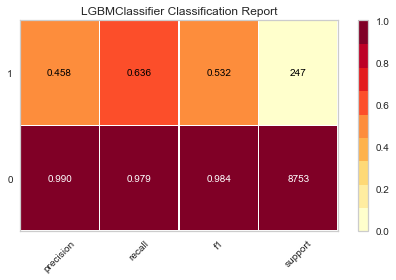

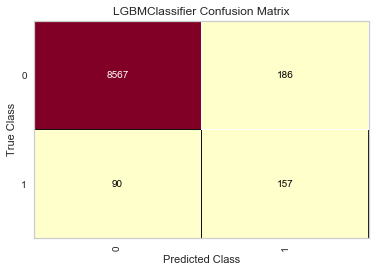

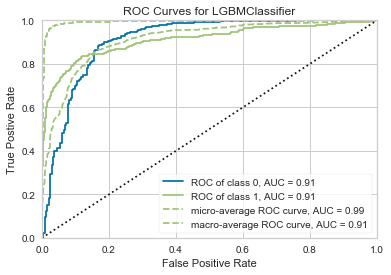

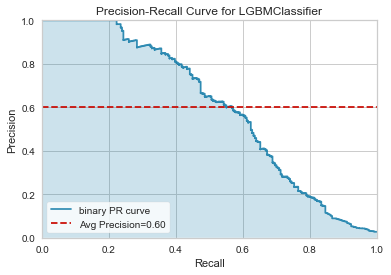

In [43]:
plot_classification_report(clf_smote, X_valid, y_valid)
plot_confusion_matrix(clf_smote, X_valid, y_valid)
plot_rocauc(clf_smote, X_valid, y_valid)
plot_pr(clf_smote, X_resampled, y_resampled, X_valid, y_valid)

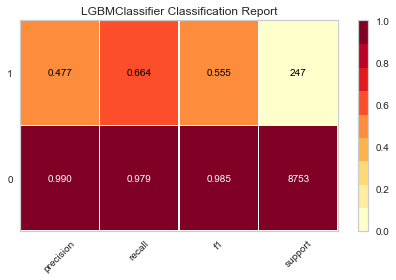

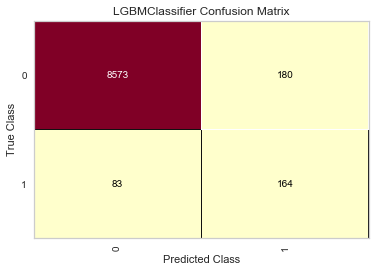

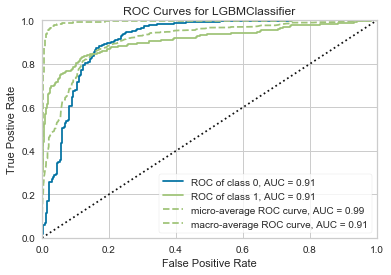

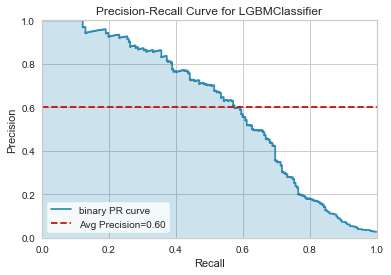

In [44]:
plot_classification_report(clf_adasyn, X_valid, y_valid)
plot_confusion_matrix(clf_adasyn, X_valid, y_valid)
plot_rocauc(clf_adasyn, X_valid, y_valid)
plot_pr(clf_adasyn, X_resampled, y_resampled, X_valid, y_valid)

## Combination 

In [48]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [49]:
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
clf_enn = train_lgb(X_resampled, y_resampled, X_valid, y_valid, lgb_params, n_estimators=500, n_jobs=1)

Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.997811	training's auc: 0.997811	valid_1's auc: 0.874887	valid_1's auc: 0.874887
[200]	training's auc: 0.999377	training's auc: 0.999377	valid_1's auc: 0.886986	valid_1's auc: 0.886986
[300]	training's auc: 0.999786	training's auc: 0.999786	valid_1's auc: 0.896097	valid_1's auc: 0.896097
[400]	training's auc: 0.999923	training's auc: 0.999923	valid_1's auc: 0.902083	valid_1's auc: 0.902083
[500]	training's auc: 0.999979	training's auc: 0.999979	valid_1's auc: 0.906648	valid_1's auc: 0.906648
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999979	training's auc: 0.999979	valid_1's auc: 0.906648	valid_1's auc: 0.906648


In [50]:
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
clf_tomek = train_lgb(X_resampled, y_resampled, X_valid, y_valid, lgb_params, n_estimators=500, n_jobs=1)

Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.997443	training's auc: 0.997443	valid_1's auc: 0.874541	valid_1's auc: 0.874541
[200]	training's auc: 0.999311	training's auc: 0.999311	valid_1's auc: 0.889658	valid_1's auc: 0.889658
[300]	training's auc: 0.999769	training's auc: 0.999769	valid_1's auc: 0.900193	valid_1's auc: 0.900193
[400]	training's auc: 0.999922	training's auc: 0.999922	valid_1's auc: 0.90572	valid_1's auc: 0.90572
[500]	training's auc: 0.999975	training's auc: 0.999975	valid_1's auc: 0.910193	valid_1's auc: 0.910193
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999975	training's auc: 0.999975	valid_1's auc: 0.910193	valid_1's auc: 0.910193


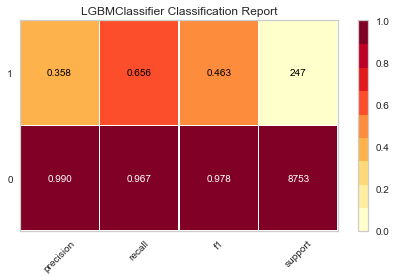

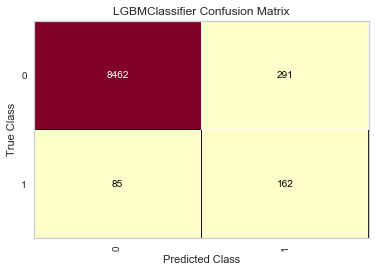

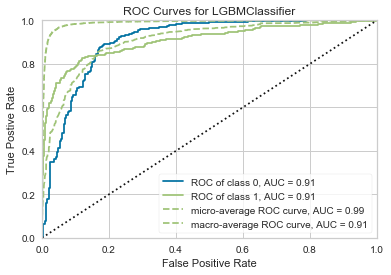

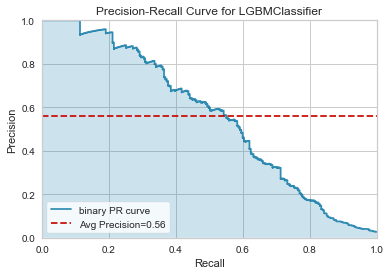

In [51]:
plot_classification_report(clf_enn, X_valid, y_valid)
plot_confusion_matrix(clf_enn, X_valid, y_valid)
plot_rocauc(clf_enn, X_valid, y_valid)
plot_pr(clf_enn, X_resampled, y_resampled, X_valid, y_valid)

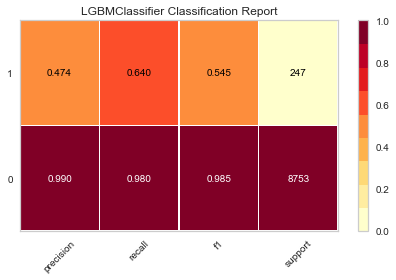

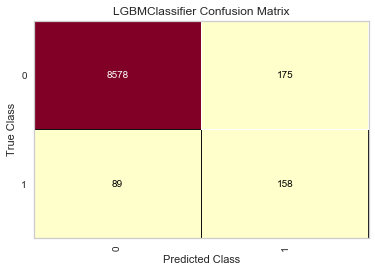

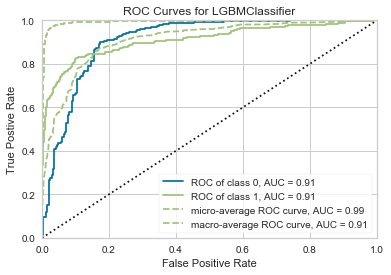

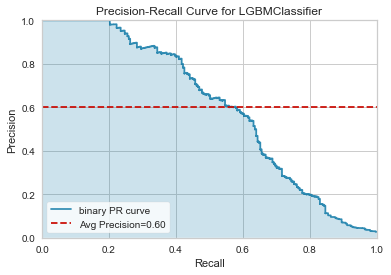

In [52]:
plot_classification_report(clf_tomek, X_valid, y_valid)
plot_confusion_matrix(clf_tomek, X_valid, y_valid)
plot_rocauc(clf_tomek, X_valid, y_valid)
plot_pr(clf_tomek, X_resampled, y_resampled, X_valid, y_valid)